## Lab 1-2, Part 2
GIS 5572, February 15, 2024
Shana Crosson

In [1]:
import arcpy

In [ ]:
# Order of operations!
# 1. Create polygon, following activity from Feb 1 --  Create a list with points (type them each out)
# 2. Convert to ArcPy Array
# 3. Create polygon
# 4. Create point geometry
# 4. Convert to WKT
# 5. attempt to import to the PostGIS db


In [27]:
# create points for polygon

a = arcpy.Point(-93.243462, 44.971507)
b = arcpy.Point(-93.243455, 44.972170)
c = arcpy.Point(-93.243180, 44.972169)
d = arcpy.Point(-93.243177, 44.971513)

pointlist = [a,b,c,d,a]

print(type(pointlist))

# Convert to an array
array = arcpy.Array(pointlist)
print(array)

# Create a polygon
square = arcpy.Polygon(array)
print(square)

# square.area
if polygon.is_valid:
    print("The coordinates form a valid polygon.")
else:
    print("The coordinates do not form a valid polygon.")

# convert to SKT
#squarewkt = (arcpy.Polygon(array).WKT)
#print(squarewkt)

<class 'list'>
<geoprocessing array object object at 0x0000022918A9F3D0>
<geoprocessing describe geometry object object at 0x000002290F6BCED0>


NameError: name 'polygon' is not defined

In [14]:
blegen = arcpy.Multipoint(array)
blegenWKT = (arcpy.Multipoint(array).WKT)
print(blegenWKT)

MULTIPOINT ((-93.243461999999994 44.971507000000003), (-93.243454999999997 44.972169999999998), (-93.243179999999995 44.972169000000001), (-93.243177000000003 44.971513000000002))


In [5]:
polyline = arcpy.Polyline(array)
print(polyline)

<geoprocessing describe geometry object object at 0x0000013E68DA2B10>


In [29]:
# Create a feature class in the PostGIS database expecting a polygon
arcpy.management.CreateFeatureclass('35.224.112.3.sde','blegen', 'POLYGON')

<Result 'Z:\\Helpdesk\\Shana\\GIS 5572\\GIS 5572_Feb1\\35.224.112.3.sde\\blegen'>

In [30]:
# add my polygon to the Feature Class
# Following this Esri documentation:https://pro.arcgis.com/en/pro-app/latest/arcpy/data-access/insertcursor-class.htm
with arcpy.da.InsertCursor('35.224.112.3.sde\labgis5572.postgres.blegen', ['SHAPE@WKT']) as cursor:
    cursor.insertRow([blegenWKT])

ValueError: invalid WKT data

In [4]:
print(f)

44.971489 -93.243452 NaN NaN


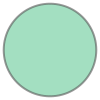

In [6]:
polyline.buffer(3)

In [28]:
blegenbuilding = arcpy.Polygon(array)
# convert to SKT
blegenbuildingWKT = (arcpy.Polygon(array).WKT)
print(blegenbuildingWKT)

if blegenbuilding.is_valid:
    print("The coordinates form a valid polygon.")
else:
    print("The coordinates do not form a valid polygon.")

MULTIPOLYGON EMPTY


AttributeError: 'Polygon' object has no attribute 'is_valid'